# Example of using the prototype tool in "Mission Design Mode"

In [1]:
import os, rcmd, sys, plot_syn
%matplotlib inline
from IPython.core.display import Image, display

In [ ]:
rcmd.run_command('./createdir_example_mba.sh')

In [ ]:
cd mba_intro/example_mba/

### Not doing a complete retrieval here, but evaluate how observations would constrain uncertainties of controlvecor components and target variables
Only `observational uncertainties` are required, not observations itself.

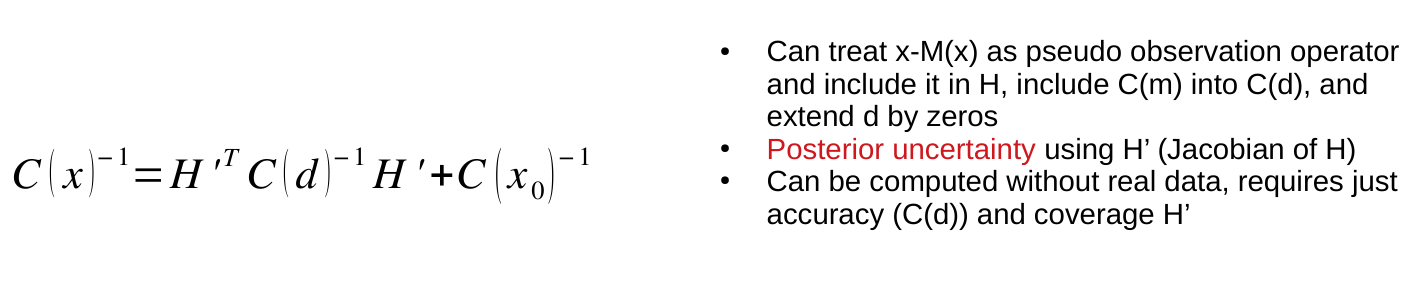

In [4]:
display(Image('../state_uncertainty_scheme.png'))

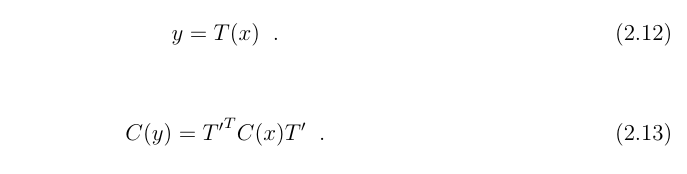

In [8]:
display(Image('../target_unc_propagation.png'))

### Performance metric is the uncertainty reduction:

In [ ]:
display(Image('../performance_metric.png'))

In [ ]:
cat ../mk.mba.txt

### Synthetic observational uncertainty will be created using a generic prior (suitable for agricultural sites)
Period is May to July 2017.

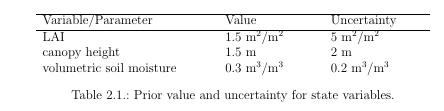

In [9]:
display(Image('../generic_prior.png'))

In [5]:
cat ../cmd.pre_s1s2.txt

bin/rs_pre.py pre_synthetic --time_start 20170501 --time_end 20170731 --target_schedule input/target_schedule_2017.txt --use_generic_prior --mission_lst S1A S1B S2A S2B


In [ ]:
rcmd.run_command('bin/rs_pre.py pre_synthetic --use_generic_prior --time_start 20170501 --time_end 20170731 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B S2A S2B')

### Create synthetic data
This time only the `uncertainty of the generated obervational data` is of relevance.

In [ ]:
rcmd.run_command('make synthetic')

### Run the uncertainty propagation
For the Demo here, we don't propagate uncertainty for target variables `FAPAR` and `HH backscatter`.

In [ ]:
rcmd.run_command('./runua.x --no_targets')

In [ ]:
rcmd.run_command('make save_exp SAVDIR=resdir_mba_s1s2')

In [ ]:
ls -ralt resdir_mba_s1s2

In [ ]:
rcmd.run_command('ncdump -v lai,lai_unc resdir_mba_s1s2/controlvector_prior.nc')

In [ ]:
rcmd.run_command('ncdump -v lai,lai_unc resdir_mba_s1s2/controlvector_post.nc')

In [ ]:
rcmd.run_command('./explist_post.py explist_uncred_lineplot --state lai resdir_mba_s1s2')

In [ ]:
display(Image('lai_uncred_20170501-20170731_s1s2.png'))

### Look at uncertainty reduction for LAI

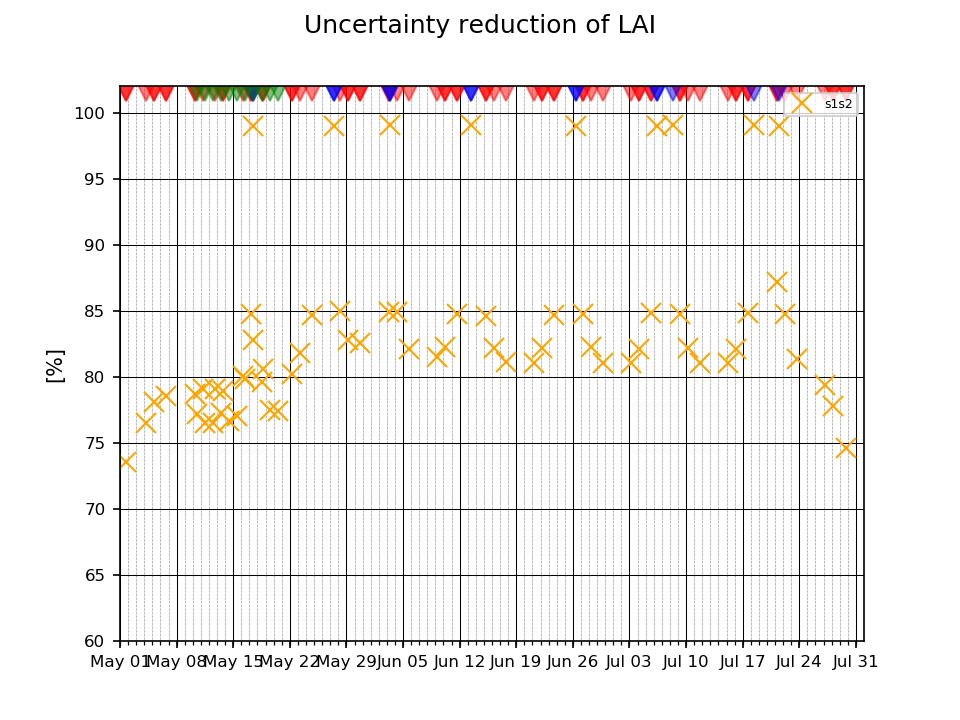

In [13]:
display(Image('../lai_uncred_20170501-20170731_s1s2.png'))

In [ ]:
rcmd.run_command('./explist_post.py explist_uncred_lineplot --state sm resdir_mba_s1s2')

In [ ]:
display(Image('sm_uncred_20170501-20170731_s1s2.png'))

### Look at uncertainty reduction for soil moisture

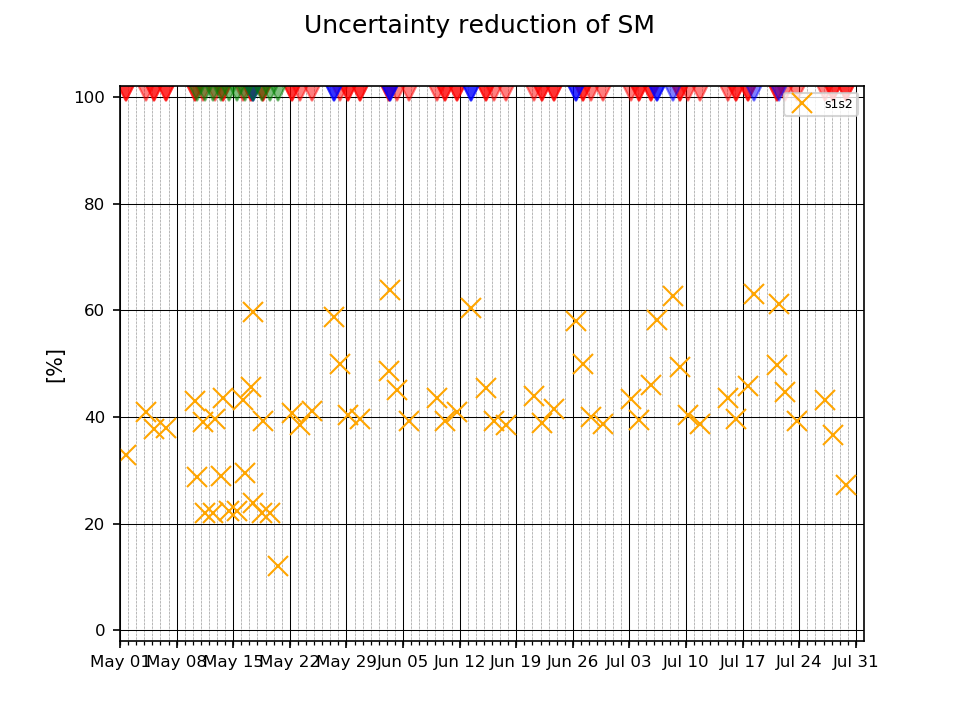

In [14]:
display(Image('../sm_uncred_20170501-20170731_s1s2.png'))

### Repeat this experiment without using the dynamical model:

In [ ]:
rcmd.run_command('bin/rs_pre.py pre_synthetic --no_use_model --use_generic_prior --time_start 20170501 --time_end 20170731 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B S2A S2B')

In [ ]:
cat retrctl.nml

In [ ]:
rcmd.run_command('./runua.x --no_targets')

In [ ]:
rcmd.run_command('make save_exp SAVDIR=resdir_mba_s1s2-nomod')

In [ ]:
rcmd.run_command('./explist_post.py explist_uncred_lineplot --state lai resdir_mba_s1s2-nomod')

In [ ]:
display(Image('lai_uncred_20170501-20170731_s1s2-nomod.png'))

### Compare performance for cases S1+S2 with and without using the dynamical model (LAI):

In [ ]:
display(Image('../lai_uncred_20170501-20170731_s1s2_s1s2-nomod.png'))

### Compare performance for cases S1+S2 with and without using the dynamical model (soil moisture):

In [ ]:
display(Image('../sm_uncred_20170501-20170731_s1s2_s1s2-nomod.png'))

### As final exercise we evaluate the performance in case both S2 satellites are not available:

In [ ]:
rcmd.run_command('bin/rs_pre.py pre_synthetic --mission_lst S1A S1B --time_start 20170501 --time_end 20170731 --target_schedule ../target_schedule_2017-plus-S2A-S2B.txt --use_generic_prior ')

In [ ]:
rcmd.run_command('make synthetic')

In [ ]:
rcmd.run_command('./runua.x --no_targets')

In [ ]:
rcmd.run_command('make save_exp SAVDIR=resdir_mba_only-s1')

In [ ]:
rcmd.run_command('./explist_post.py explist_uncred_lineplot resdir_mba_s1s2 resdir_mba_only-s1/ --state lai')

In [ ]:
display(Image('lai_uncred_20170501-20170731_s1s2_only-s1.png'))

#### Compare performance (LAI) for cases S1+S2 and only-S1:

In [ ]:
display(Image('../lai_uncred_20170501-20170731_s1s2_only-s1.png'))

In [ ]:
rcmd.run_command('./explist_post.py explist_uncred_lineplot resdir_mba_s1s2 resdir_mba_only-s1/ --state sm')

In [ ]:
display(Image('sm_uncred_20170501-20170731_s1s2_only-s1.png'))

#### Compare performance (LAI) for cases S1+S2 and only-S1:

In [ ]:
display(Image('../sm_uncred_20170501-20170731_s1s2_only-s1.png'))